In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

In [2]:
dataset = "ogb-arxiv"#"photo"
parameter = "pseudo_loss_weight"

In [3]:
datasets = ["photo", "ogb-arxiv"] 
#parameters = ["sup_loss_weight", "unsup_loss_weight", "pseudo_loss_weight", "entropy_loss_weight", "sup_temp", "pseudo_temp"]#, "ood_percentile"]entropy_loss_weight
parameters = ["sup_temp", "pseudo_temp"]#, "ood_percentile"]entropy_loss_weight

In [4]:
optim_values_photo = {
    "entropy_loss_weight": 0.10102479086956818,
    "sup_loss_weight": 0.8633859874737368,
    "pseudo_loss_weight" : 0.4615071932371104,
    "ood_percentile" : 0.8828990126298749,
    "unsup_loss_weight" : 0.30869833725565904,
    "sup_temp" : 0.1,
    "pseudo_temp" : 0.7
}

In [5]:
optim_values_arxiv = {
    "entropy_loss_weight": 0.13989925789728974,
    "sup_loss_weight": 0.5496240559571351,
    "pseudo_loss_weight" : 0.26271245362228723,
    "ood_percentile" : 0.3341549023301812,
    "unsup_loss_weight" : 0.6705940079253068,
    "sup_temp" : 0.1,
    "pseudo_temp" : 0.7
}

In [6]:
name_mapping = {
    "entropy_loss_weight": "entropy weight",
    "sup_loss_weight": "supervised weight",
    "pseudo_loss_weight" : "pseudo label weight",
    "ood_percentile" : "OOD ratio",
    "unsup_loss_weight" : "Unsupervsied weight",
    "sup_temp" : "Supervised Temperature",
    "pseudo_temp" : "Pseudo-label Temperature"
    
}

In [7]:
dataset_map = {
    "photo" : "Photo",
    "ogb-arxiv" : "OGB-arXiv"
}

In [8]:
def load_df(dataset, parameter, eps = 0.0001):
    
    path = Path("hp_sensitivity_results/"+dataset+"_"+parameter+".csv")
    df = pd.read_csv(path).round(decimals=4).sort_values(by =parameter)
    df['Dataset'] = dataset_map[dataset]
    df['parameter'] = name_mapping[parameter]
    df['Hyperparameter value'] = df[parameter]
    if dataset == "photo":
       optim_values = optim_values_photo
    else:
        optim_values = optim_values_arxiv
    
    optim_hp = np.round(optim_values[parameter], decimals=4)
    test_acc_idx = 11 - np.argmin(np.abs(df[parameter] - optim_values[parameter]))
    all_test_acc = df["all_test_acc_run_final"]
    #test_acc_optim = all_test_acc[11-test_acc_idx]
    if dataset == "photo":
        test_acc_optim = 0.7127
    else:
        test_acc_optim = 0.5551

    print("Start: "+ parameter)
    print(df["Hyperparameter value"])
    print(df["unknown_test_acc_run_final"])
    print("End "+parameter)
    df.loc[test_acc_idx, "all_test_acc_run_final"] = test_acc_optim
    df = df.rename(columns={"all_test_acc_run_final": "All test accuracy"})
  
    #colors = ["C1" if (value >=optim_hp-eps) & (value <=optim_hp+eps) else "C0" for value in df[parameter]]
    #df['color'] = colors
    return df, (optim_hp, test_acc_optim), (dataset, parameter)

In [9]:
dfs = []
coordinates = []
plot_indices = []
for dataset in datasets:
 
    for parameter in parameters:
  
        df, coordinate, plot_index = load_df(dataset, parameter)
        dfs.append(df)
        coordinates.append(coordinate)
        print(coordinate)
        plot_indices.append(plot_index)

Start: sup_temp
9     0.01
8     0.05
7     0.08
6     0.10
5     0.20
4     0.50
3     0.80
2     1.00
1     5.00
0    10.00
Name: Hyperparameter value, dtype: float64
9    0.6992
8    0.6724
7    0.7009
6    0.6945
5    0.7001
4    0.7166
3    0.7219
2    0.7256
1    0.7238
0    0.7253
Name: unknown_test_acc_run_final, dtype: float64
End sup_temp
(0.1, 0.7127)
Start: pseudo_temp
9     0.01
8     0.05
7     0.10
6     0.50
5     0.60
4     0.70
3     0.80
2     1.00
1     5.00
0    10.00
Name: Hyperparameter value, dtype: float64
9    0.7100
8    0.7307
7    0.7012
6    0.6637
5    0.7095
4    0.7175
3    0.7067
2    0.6825
1    0.6953
0    0.6872
Name: unknown_test_acc_run_final, dtype: float64
End pseudo_temp
(0.7, 0.7127)
Start: sup_temp
9     0.01
8     0.05
7     0.08
6     0.10
5     0.20
4     0.50
3     0.80
2     1.00
1     5.00
0    10.00
Name: Hyperparameter value, dtype: float64
9    0.5278
8    0.5253
7    0.5561
6    0.5065
5    0.5284
4    0.5522
3    0.5636
2    0.5148

In [10]:
final_df = pd.concat(dfs, ignore_index=True)
final_df["All test accuracy"]

0     0.5978
1     0.7127
2     0.7095
3     0.7113
4     0.6168
5     0.3979
6     0.3619
7     0.3430
8     0.3395
9     0.3390
10    0.3718
11    0.3613
12    0.4987
13    0.7127
14    0.7033
15    0.7113
16    0.6873
17    0.7118
18    0.6838
19    0.6898
20    0.5464
21    0.5551
22    0.5617
23    0.5515
24    0.5523
25    0.4975
26    0.3763
27    0.4515
28    0.2816
29    0.2816
30    0.5434
31    0.5421
32    0.5032
33    0.5551
34    0.5524
35    0.5515
36    0.5657
37    0.5557
38    0.5548
39    0.5505
Name: All test accuracy, dtype: float64

In [11]:
#mask = final_df["pseudo_temp"] != 10
#final_df = final_df[mask]

#mask = final_df["sup_temp"] != 10 
#final_df = final_df[mask]

#mask = final_df["pseudo_temp"] != 5
#final_df = final_df[mask]

#mask = final_df["sup_temp"] != 5
#final_df = final_df[mask]

In [12]:
print(coordinates)

[(0.1, 0.7127), (0.7, 0.7127), (0.1, 0.5551), (0.7, 0.5551)]


(0.1, 0.7127)


/media/data1/mhoffmann/owp/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.7, 0.7127)


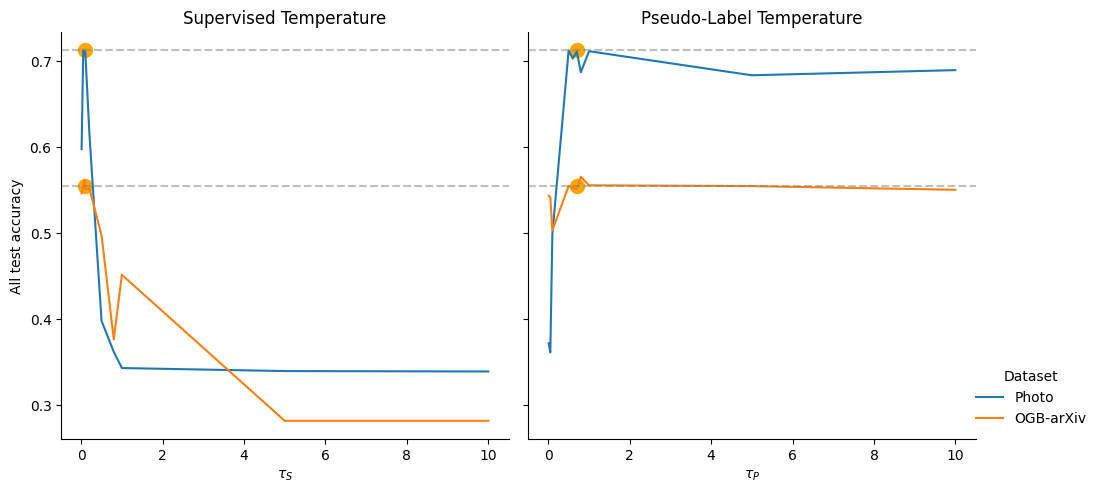

In [13]:
#add real dots
figure = sns.relplot(data=final_df, x="Hyperparameter value", y="All test accuracy", hue="Dataset", col="parameter", kind="line")

#titles = ["Supervised weight", "Unsupervised weight", "Pseudo weight", "Entropy weight", "Supervised Temperature", "Pseudo-Label Temperature"]
#x_labels = ["$\lambda$", "$\mu$", "$\\nu$", "$\kappa$", "$\\tau_S$", "$\\tau_P$"]

titles = ["Supervised Temperature", "Pseudo-Label Temperature"]
x_labels = ["$\\tau_S$", "$\\tau_P$"]
for j in range(len(parameters)):
    i = 0
    dot_coord = coordinates[j]
    print(dot_coord)
    ax = figure.facet_axis(i,j)
    ax.scatter(x=dot_coord[0], y=dot_coord[1], c="orange", marker='o', s=100, label='Specific Dot')
    ax.axhline(y=dot_coord[1], color='gray', linestyle='--', alpha=0.5)

    dot_coord = coordinates[j+len(parameters)]
    ax.scatter(x=dot_coord[0], y=dot_coord[1], c="orange", marker='o', s=100, label='Specific Dot')
    ax.axhline(y=dot_coord[1], color='gray', linestyle='--', alpha=0.5)
    ax.set_xlabel(x_labels[j])
    ax.set_title(titles[j])

sns.move_legend(figure, "upper left", bbox_to_anchor=(.870, .28))
plt.savefig("figures/Temp_sensitivity_global.pdf")

In [14]:
ax.facet_axis(0,0).scatter(x=0.5, y=0.7, c="red", marker='o', s=100, label='Specific Dot')

AttributeError: 'Axes' object has no attribute 'facet_axis'

In [ ]:
sns.barplot(data=final_df, x="weight", y="all_test_acc_run_final", hue="color", row="dataset", col="parameter")

In [ ]:
df = load_df(dataset, parameter)
df.head(5)

In [ ]:
weights = df[parameter]
all_test_acc = df["all_test_acc_run_final"]
print(weights, all_test_acc)

In [ ]:
weights

In [ ]:
optim_hp = optim_values[parameter]
optim_hp

In [ ]:
test_acc_idx = np.argmin(np.abs(weights - optim_values[parameter]))
test_acc_optim = all_test_acc[11-test_acc_idx]

In [ ]:
plt.plot(weights, all_test_acc)
plt.plot(optim_values[parameter],test_acc_optim, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.axhline(y = test_acc_optim, color = 'grey', linestyle = '-') 
plt.ylim((0.6, 0.75))

In [ ]:
eps = 0.0001
colors = ["C1" if (value >=optim_hp-eps) & (value <=optim_hp+eps) else "C0" for value in df[parameter]]
colors

In [ ]:
x = weights
y = all_test_acc
ax = sns.barplot(x=x, y=y, palette = colors, width=0.2)
plt.axhline(y = test_acc_optim, color = 'grey', linestyle = '-')
plt.ylabel("All accuracy")
plt.xlabel("Entropy regularizer weight")
plt.xticks(rotation=40)

#ax.set_xticklabels(df["entropy_loss_weight"], rotation=45)  # You can adjust the rotation as needed
#ax.set(xticklabels=[0.0, 1.0])
